# Policy Gradient Methods
*** for solving `CartPole-v0` (in $100$ episodes) ***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from parameters import parameters_array

In [2]:
def plot(indices):

    plt.figure(
        figsize=(16, 8)
    )

    for parameters_index, parameters in enumerate(parameters_array):
        if parameters_index in indices:

            file_name = f'df_{parameters_index}.csv'
            runs = pd.read_csv(file_name, index_col=0)

            _, runs_amount = runs.shape

            label = ''

            # gamma
            label += r'$\gamma = ' + str(parameters["gamma"]) + '$'

            # feature info
            label += ', ' + 'feature mode: ' + parameters['feature info']['mode']
            label += ', ' + 'degree: ' + str(parameters['feature info']['degree'])

            # learning method
            label += ', ' + 'learning method: ' + parameters['learning method']

            if parameters['learning method'] == 'REINFORCE':
                label += ', ' + r'$\alpha = ' + str(parameters["alpha"]) + '$'

            elif parameters['learning method'] in ['REINFORCE with Baseline', 'One-step Actor-Critic']:

                label += ', ' + r'$\alpha_\theta = ' + str(parameters["alpha_theta"]) + '$'
                label += ', ' + r'$\alpha_w = ' + str(parameters["alpha_w"]) + '$'

            else:
                raise NotImplementedError(parameters['learning method'])

            label += ', ' + f'averaged over {runs_amount} runs'

            runs.mean(axis=1).plot(label=label)

    plt.suptitle('CartPole-v0')
    plt.xlabel('Episode')
    plt.ylabel(f'$G_0$, Total reward on episode')

    plt.legend()
    plt.show()

## REINFORCE

It seems like $\alpha = 0.1$ is a sweet spot.
Decreasing it slightly will drastically decrease learning performance.
Increasing it further is also not better.

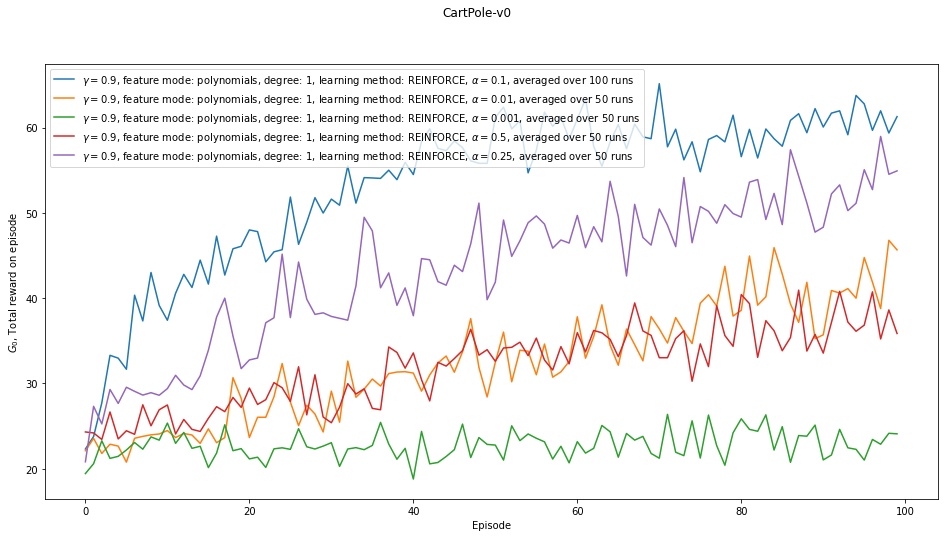

In [3]:
plot([0, 6, 7, 8, 9])

## REINFORCE with Baseline

Including a baseline does not seem to be a good idea either.
This is due to using $\delta = G - \hat v(S_t, \mathbf w)$ instead of $G$.
It effectively causes "$\alpha$ to deviate from its sweetspot $0.1$".

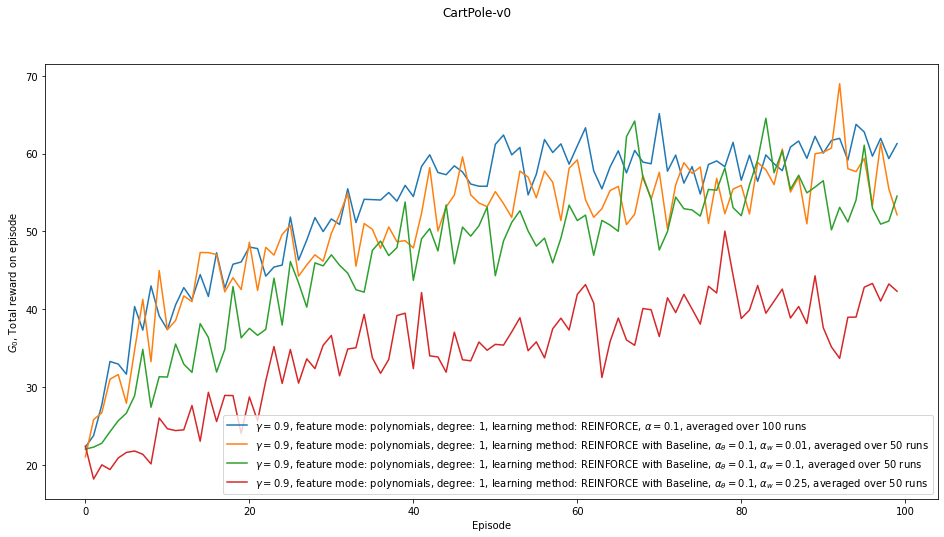

In [4]:
plot([0, 1, 2, 3])

## REINFORCE with variable Step-Sizes

Since a variable step size also makes $\alpha \neq 0.1$, the agent performes worse than with the constant $\alpha = 0.1$.
The only reasonable candidate is $\alpha_n(a) = 1 / \sqrt n$, because at least $\alpha_{100} = 0.1$.

Note that

\begin{align}
    \sum_{n=1}^\infty 1 / n = \infty       & \quad \text{and} \quad \sum_{n=1}^\infty (1 / n)^2 < \infty$,            \\
    \sum_{n=1}^\infty 1 - 1 / n = \infty   & \quad \text{and} \quad \sum_{n=1}^\infty (1 - 1 / n)^2 \not < \infty$,   \\
    \sum_{n=1}^\infty 1 / n^2 \neq \infty  & \quad \text{and} \quad \sum_{n=1}^\infty (1 / n^2)^2 < \infty$,          \\
    \sum_{n=1}^\infty 1 / \sqrt n = \infty & \quad \text{and} \quad \sum_{n=1}^\infty (1 / \sqrt n)^2 \not < \infty$. \\
\end{align}

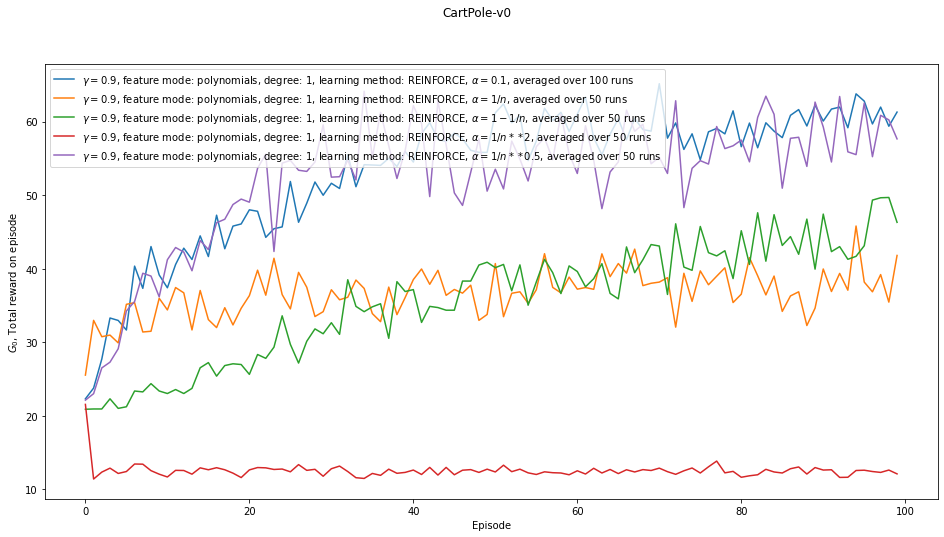

In [5]:
plot([0, 5, 10, 11, 12])

## One-step Actor-Critic

Although noch performing as well as REINFORCE, it does ok if $\alpha_\theta = \alpha_w = 0.1$, i.e. the sweet spot.

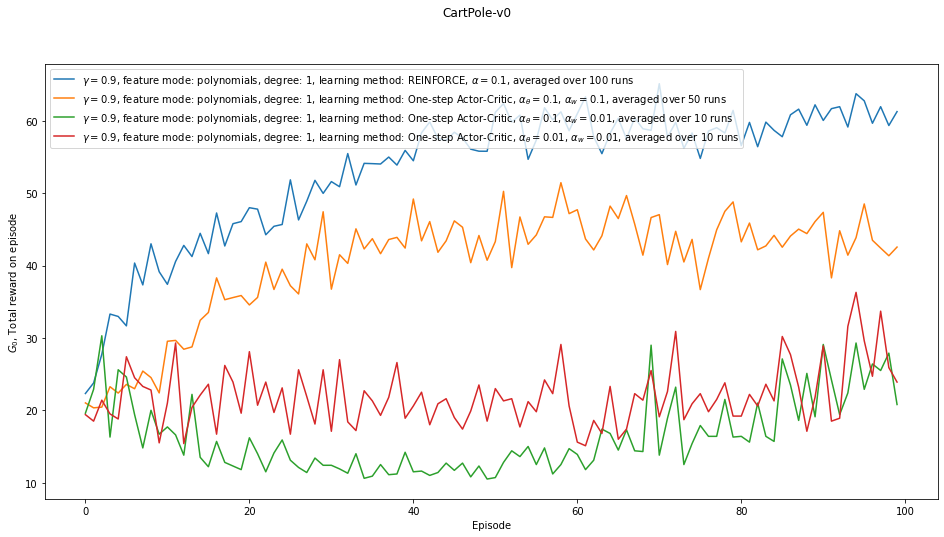

In [6]:
plot([0, 4, 13, 14])

## REINFORCE with varying $\gamma$

In this case, it seems to be best to look into the future a lot, not too much.
Apparently, the sweet spot is the classical $\gamma = 0.9$.

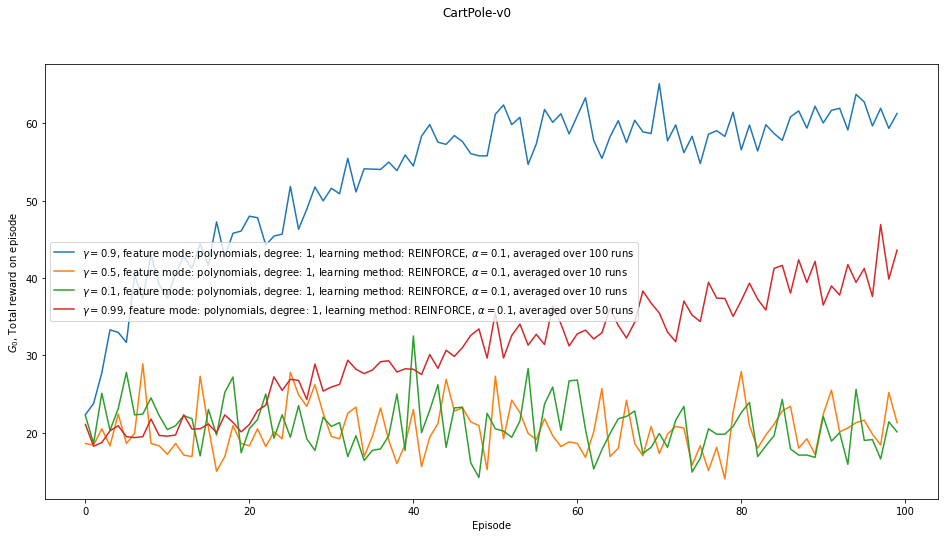

In [10]:
plot([0, 15, 16, 17])

## Conclusion

For solving `CartPole-v0` in $100$ episodes, the best method seems to be REINFORCE with discount rate $\gamma = 0.9$ and constant step-size $\alpha = 0.1$.